# Árvores de Decisão - Parte 2

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [2]:
X = np.array([[2.771244718,1.784783929],
  [1.728571309,1.169761413],
  [3.678319846,2.81281357],
  [3.961043357,2.61995032],
  [2.999208922,2.209014212],
  [7.497545867,3.162953546],
  [9.00220326,3.339047188],
  [7.444542326,0.476683375],
  [10.12493903,3.234550982],
  [6.642287351,3.319983761]])
X

array([[ 2.77124472,  1.78478393],
       [ 1.72857131,  1.16976141],
       [ 3.67831985,  2.81281357],
       [ 3.96104336,  2.61995032],
       [ 2.99920892,  2.20901421],
       [ 7.49754587,  3.16295355],
       [ 9.00220326,  3.33904719],
       [ 7.44454233,  0.47668338],
       [10.12493903,  3.23455098],
       [ 6.64228735,  3.31998376]])

In [3]:
X_tmp = np.array(X)
X[:, 0] = X_tmp[:, 1]
X[:, 1] = X_tmp[:, 0]

In [4]:
X

array([[ 1.78478393,  2.77124472],
       [ 1.16976141,  1.72857131],
       [ 2.81281357,  3.67831985],
       [ 2.61995032,  3.96104336],
       [ 2.20901421,  2.99920892],
       [ 3.16295355,  7.49754587],
       [ 3.33904719,  9.00220326],
       [ 0.47668338,  7.44454233],
       [ 3.23455098, 10.12493903],
       [ 3.31998376,  6.64228735]])

In [5]:
y = np.array([0,0,0,0,0,1,1,1,1,1])
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [6]:
model = tree.DecisionTreeClassifier(criterion='gini')

In [7]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
df = pd.DataFrame(X)
df['label'] = y
df

,0,1,label
0,1.784784,2.771245,0
1,1.169761,1.728571,0
2,2.812814,3.678320,0
3,2.619950,3.961043,0
4,2.209014,2.999209,0
5,3.162954,7.497546,1
6,3.339047,9.002203,1
7,0.476683,7.444542,1
8,3.234551,10.124939,1
9,3.319984,6.642287,1


In [9]:
df.sort_values(by=0)

,0,1,label
7,0.476683,7.444542,1
1,1.169761,1.728571,0
0,1.784784,2.771245,0
4,2.209014,2.999209,0
3,2.619950,3.961043,0
2,2.812814,3.678320,0
5,3.162954,7.497546,1
8,3.234551,10.124939,1
9,3.319984,6.642287,1
6,3.339047,9.002203,1


In [10]:
(3.961043 + 6.642287)/2

5.301665

In [11]:
print(tree.export_graphviz(model))

digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 5.302\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
1 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


[Text(167.4, 163.07999999999998, 'X[1] <= 5.302\nentropy = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

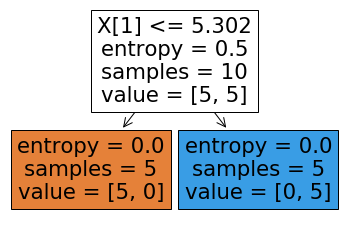

In [12]:
tree.plot_tree(model, filled=True)

In [13]:
df = pd.DataFrame(X)
df['label'] = y
df

,0,1,label
0,1.784784,2.771245,0
1,1.169761,1.728571,0
2,2.812814,3.678320,0
3,2.619950,3.961043,0
4,2.209014,2.999209,0
5,3.162954,7.497546,1
6,3.339047,9.002203,1
7,0.476683,7.444542,1
8,3.234551,10.124939,1
9,3.319984,6.642287,1


### Gini
$$ I_G(t) = 1 - \sum_{i=1}^{c}{p(i | t)^2} $$

In [14]:
df.sort_values(by=0)

,0,1,label
7,0.476683,7.444542,1
1,1.169761,1.728571,0
0,1.784784,2.771245,0
4,2.209014,2.999209,0
3,2.619950,3.961043,0
2,2.812814,3.678320,0
5,3.162954,7.497546,1
8,3.234551,10.124939,1
9,3.319984,6.642287,1
6,3.339047,9.002203,1


In [15]:
model.feature_importances_

array([0., 1.])

In [16]:
1 - ( (5/10)**2 + (5/10)**2 )

0.5

In [17]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5, 5]))

In [18]:
np.bincount(y)

array([5, 5])

In [19]:
cond = X[:, 0] < 2.77124472
cond

array([ True,  True, False,  True,  True, False, False,  True, False,
       False])

In [20]:
y[np.invert(cond)]

array([0, 1, 1, 1, 1])

In [21]:
np.bincount(X[:, 0] < 2.77124472)

array([5, 5])

In [22]:
1 - ( (8/10)**2 + (2/10)**2 ) 

0.31999999999999984

In [23]:
np.bincount(X[:, 0] < 1.728571309)

array([8, 2])